In [1]:
# 1. 필요한 라이브러리 및 모듈 import
import sys
sys.path.append('../src')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ml_project.data.preprocessing import DataPreprocessor

In [2]:
# 2. 샘플 데이터 로드
sample_data = pd.read_csv('../data/raw/csv_files/sample_weather_data.csv')

In [3]:
# 3. 각각의 스케일링 방법으로 테스트
preprocessor = DataPreprocessor()

# 모든 스케일링 방법 적용
methods = ['standard', 'minmax', 'robust', 'maxabs']
scaled_results = {}

for method in methods:
    scaled_df, scaler = preprocessor.scale_features(sample_data, method=method)
    scaled_results[method] = scaled_df

250120163208 - [ml_project.data.preprocessing:168] - INFO - [ preprocessing.py:scale_features ] Scaling columns: Index(['temperature', 'humidity', 'wind_speed', 'precipitation'], dtype='object') using standard method
250120163208 - [ml_project.data.preprocessing:194] - INFO - [ preprocessing.py:scale_features ] Column: temperature
250120163208 - [ml_project.data.preprocessing:195] - INFO - [ preprocessing.py:scale_features ] Before scaling - mean: 20.08, std: 4.94
250120163208 - [ml_project.data.preprocessing:196] - INFO - [ preprocessing.py:scale_features ] After scaling - mean: 0.00, std: 1.00
250120163208 - [ml_project.data.preprocessing:194] - INFO - [ preprocessing.py:scale_features ] Column: humidity
250120163208 - [ml_project.data.preprocessing:195] - INFO - [ preprocessing.py:scale_features ] Before scaling - mean: 60.97, std: 15.06
250120163208 - [ml_project.data.preprocessing:196] - INFO - [ preprocessing.py:scale_features ] After scaling - mean: 0.00, std: 1.00
250120163208 

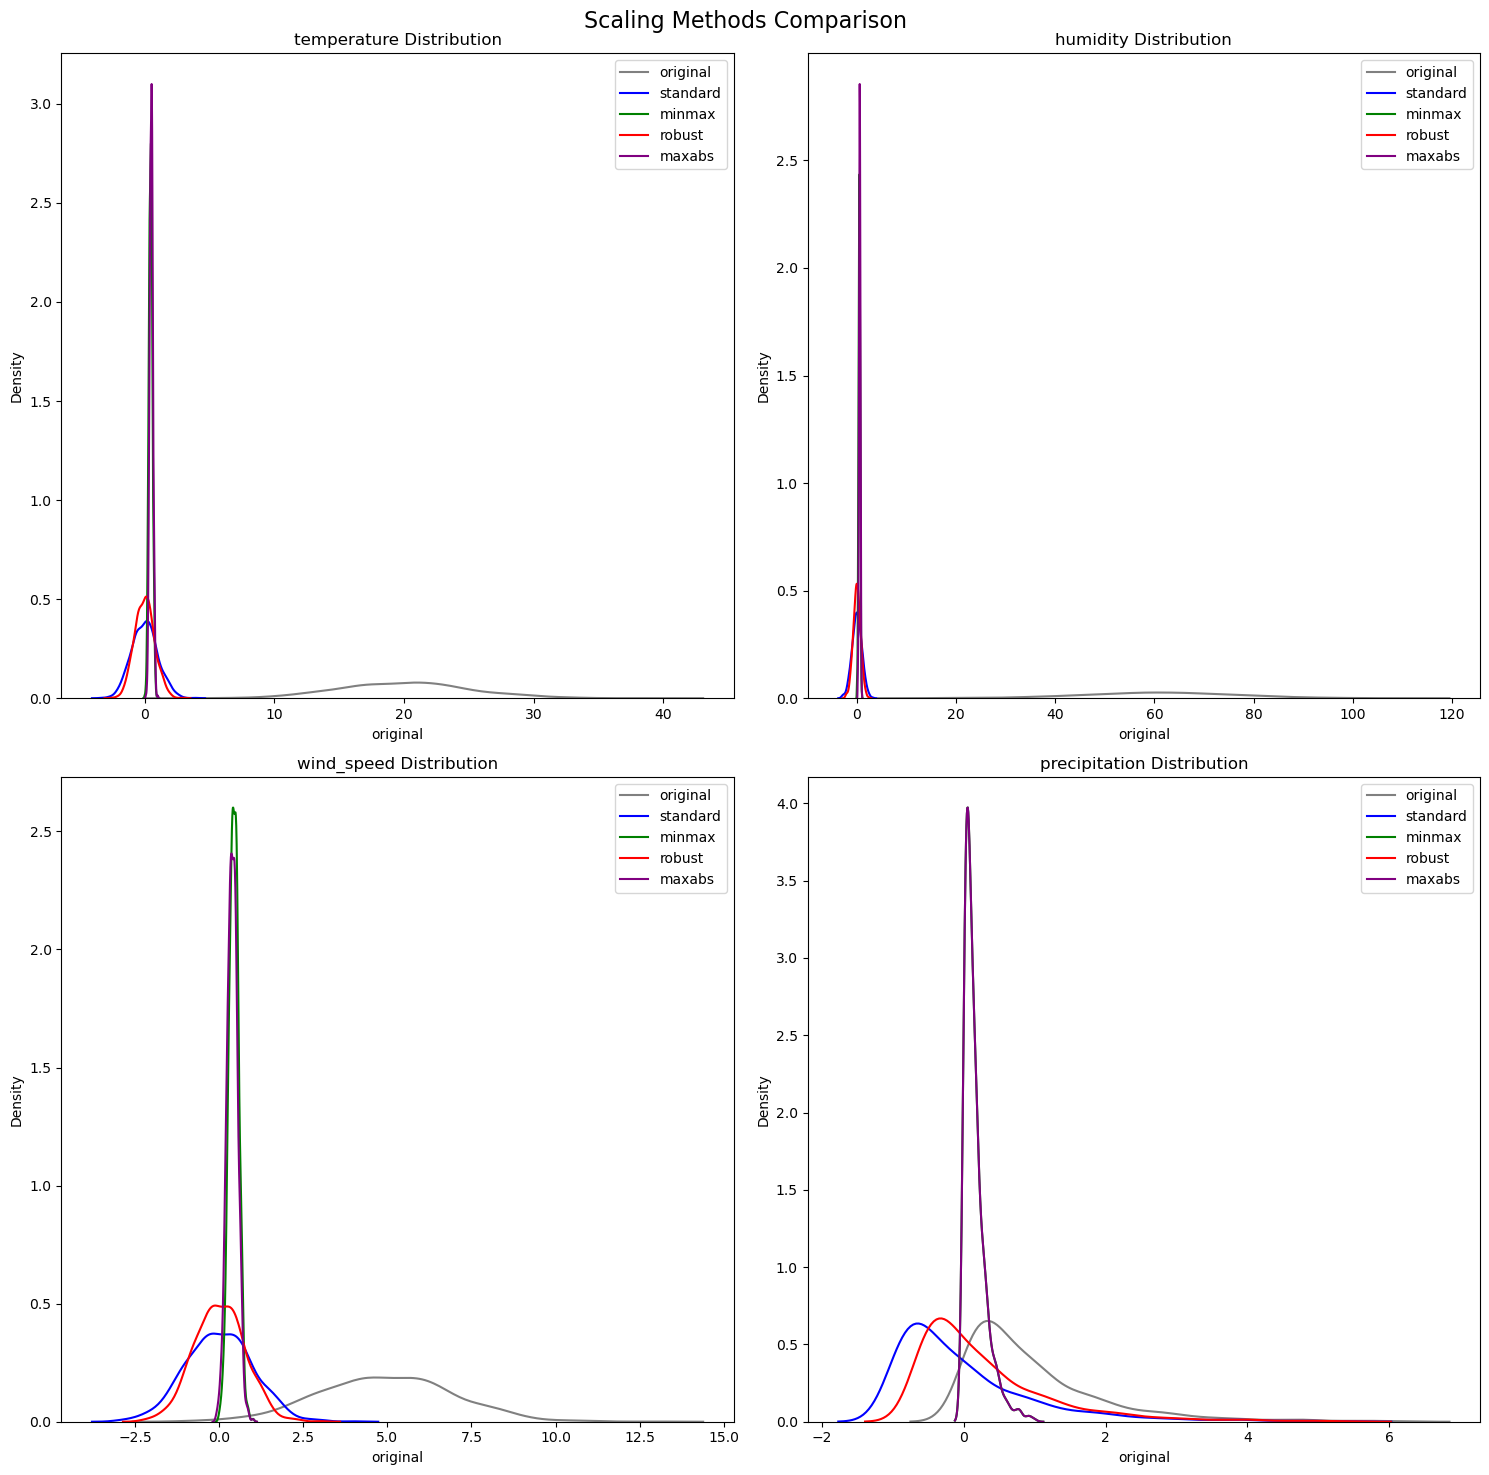

In [6]:
# 4. 스케일링 결과 시각화 (모든 방법 한 그래프에서 비교)
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
fig.suptitle('Scaling Methods Comparison', fontsize=16)

colors = {
    'original': 'gray',
    'standard': 'blue',
    'minmax': 'green',
    'robust': 'red',
    'maxabs': 'purple'
}

for idx, column in enumerate(sample_data.columns):
    row = idx // 2
    col = idx % 2
    
    # 데이터 준비
    plot_data = pd.DataFrame({
        'original': sample_data[column],
        **{method: scaled_results[method][column] for method in methods}
    })
    
    # 각 방법별로 분포 그리기
    for method in ['original'] + methods:
        sns.kdeplot(
            data=plot_data[method],
            ax=axes[row, col],
            label=method,
            color=colors[method]
        )
    
    axes[row, col].set_title(f'{column} Distribution')
    axes[row, col].legend()

plt.tight_layout()
plt.show()

In [7]:
# 5. 기술 통계량 비교
stats_comparison = pd.concat(
    [sample_data.describe()] + 
    [scaled_results[method].describe() for method in methods],
    axis=1,
    keys=['original'] + methods
)
print("\n스케일링 방법별 기술 통계량 비교:")
print(stats_comparison)


스케일링 방법별 기술 통계량 비교:
         original                                            standard  \
      temperature    humidity  wind_speed precipitation   temperature   
count  905.000000  894.000000  891.000000    904.000000  9.050000e+02   
mean    20.081718   60.972768    4.971870      0.971956  8.047583e-17   
std      4.941577   15.060346    1.993786      0.975022  1.000553e+00   
min      3.793663   15.894170   -1.039024      0.000031 -3.297947e+00   
25%     16.736880   50.868511    3.646727      0.285178 -6.772509e-01   
50%     20.134429   61.091144    4.952896      0.674053  1.067277e-02   
75%     23.238443   70.970812    6.273810      1.310180  6.391624e-01   
max     39.263657  107.896614   12.852475      6.096554  3.883891e+00   

                                                     minmax              \
           humidity    wind_speed precipitation temperature    humidity   
count  8.940000e+02  8.910000e+02  9.040000e+02  905.000000  894.000000   
mean   7.947905e-18  5.